In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer
#importing files
warnings.simplefilter('ignore')


In [2]:
movie=pd.read_csv('movies.csv')
movie


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [3]:
rate = pd.read_csv('ratings.csv')
rate


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [4]:
tag=pd.read_csv('tags.csv')
tag.groupby('tag')['movieId'].count().sort_values(ascending=False)

tag
In Netflix queue     131
atmospheric           36
thought-provoking     24
superhero             24
surreal               23
                    ... 
exciting               1
faerie tale            1
fairy tale             1
falling                1
"artsy"                1
Name: movieId, Length: 1589, dtype: int64

In [5]:
#merging the movie and ratings DataFrame
df = pd.merge(movie,rate,on='movieId')
df


,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [6]:
#A DataFrame with the avg. and total rating for every movie
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.sort_values('num of ratings',ascending=True).head()

,rating,num of ratings
title,,
'71 (2014),4.0,1
Latter Days (2003),3.5,1
"Late Shift, The (1996)",2.5,1
Late Night with Conan O'Brien: The Best of Triumph the Insult Comic Dog (2004),2.0,1
Late Night Shopping (2001),4.5,1


In [7]:
#A DataFrame with the avg. and total rating by every User
rating_user= pd.DataFrame(df.groupby('userId')['rating'].mean())
rating_user['nor']=pd.DataFrame(df.groupby('userId')['rating'].count())
rating_user=rating_user[rating_user['nor']>100].sort_values('nor')
rating_user.head(10)

,rating,nor
userId,,
601,4.425743,101
412,3.892157,102
32,3.754902,102
593,3.266990,103
40,3.766990,103
309,3.839806,103
17,4.209524,105
436,3.179245,106
286,3.787736,106


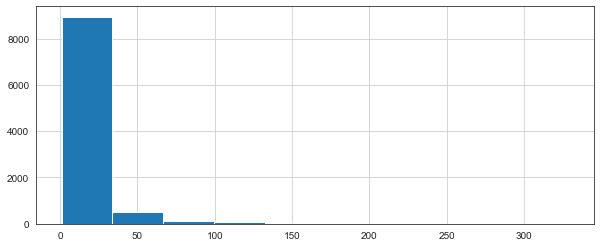

In [8]:
sns.set_style('white')
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=10)

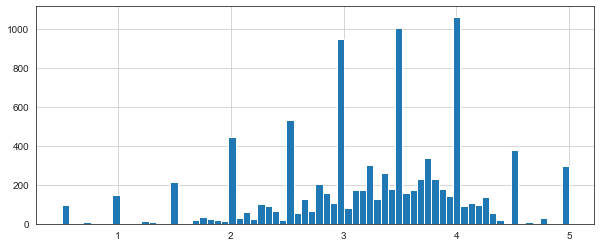

In [9]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

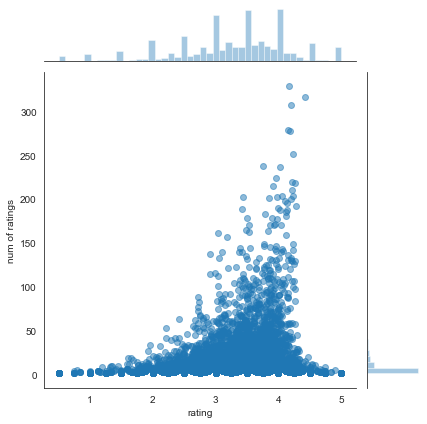

In [10]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)


In [11]:
#A DataFrame telling What every User Gave rating To every Movie
mov_user=rate.pivot_table(index='movieId',columns='userId',values='rating')
mov_user

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#genre : feature 2
genre_unique=set()
for i in movie['genres']:
    a=i.split('|')
    for j in a :
        if (j not in genre_unique):
            genre_unique.add(j)
print(genre_unique)

#divide genre into different columns apply the formula 
#see the favourite genre in descending order
#specify the films with the most loved genre by user in order of their mean ratings

{'Western', 'Sci-Fi', 'IMAX', 'Fantasy', 'Documentary', 'Romance', 'Adventure', 'Crime', 'Mystery', 'Musical', 'Comedy', 'Animation', 'Drama', '(no genres listed)', 'War', 'Film-Noir', 'Action', 'Horror', 'Children', 'Thriller'}


In [13]:
genre_matrix=pd.DataFrame(np.zeros((9742,20)),columns=genre_unique,index=movie['movieId'])
genre_matrix


,Western,Sci-Fi,IMAX,Fantasy,Documentary,Romance,Adventure,Crime,Mystery,Musical,Comedy,Animation,Drama,(no genres listed),War,Film-Noir,Action,Horror,Children,Thriller
movieId,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
for i,m in zip(movie['genres'],movie['movieId'] ):
    gen=i.split('|')
    for j in genre_unique:
        if(j in gen):
            genre_matrix.loc[m,j]=1

In [15]:
mu1=mov_user.copy()
mo_us=mov_user.fillna(mov_user.mean(),axis=0)
mo_us

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.000000,3.948276,2.435897,3.555556,4.000000,3.493631,4.500000,3.574468,3.26087,3.278571,...,4.000000,3.392593,4.000000,3.00,4.000000,2.500000,4.000000,2.500000,3.00000,5.000000
2,4.366379,3.948276,2.435897,3.555556,3.636364,4.000000,3.230263,4.000000,3.26087,3.278571,...,4.425743,4.000000,3.507953,5.00,3.500000,3.657399,3.786096,2.000000,3.27027,3.688556
3,4.000000,3.948276,2.435897,3.555556,3.636364,5.000000,3.230263,3.574468,3.26087,3.278571,...,4.425743,3.392593,3.507953,3.48,3.210407,3.657399,3.786096,2.000000,3.27027,3.688556
4,4.366379,3.948276,2.435897,3.555556,3.636364,3.000000,3.230263,3.574468,3.26087,3.278571,...,4.425743,3.392593,3.507953,3.48,3.210407,3.657399,3.786096,3.134176,3.27027,3.688556
5,4.366379,3.948276,2.435897,3.555556,3.636364,5.000000,3.230263,3.574468,3.26087,3.278571,...,4.425743,3.392593,3.507953,3.00,3.210407,3.657399,3.786096,3.134176,3.27027,3.688556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,4.366379,3.948276,2.435897,3.555556,3.636364,3.493631,3.230263,3.574468,3.26087,3.278571,...,4.425743,3.392593,3.507953,3.48,3.210407,3.657399,3.786096,3.134176,3.27027,3.688556
193583,4.366379,3.948276,2.435897,3.555556,3.636364,3.493631,3.230263,3.574468,3.26087,3.278571,...,4.425743,3.392593,3.507953,3.48,3.210407,3.657399,3.786096,3.134176,3.27027,3.688556
193585,4.366379,3.948276,2.435897,3.555556,3.636364,3.493631,3.230263,3.574468,3.26087,3.278571,...,4.425743,3.392593,3.507953,3.48,3.210407,3.657399,3.786096,3.134176,3.27027,3.688556


In [17]:
from sklearn.metrics.pairwise import cosine_similarity
Similarity=cosine_similarity(mo_us.transpose())
similarity_with_user =pd.DataFrame(Similarity,index=mov_user.columns,columns=mov_user.columns)

similarity_with_user.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.999542,0.998167,0.998170,0.999449,0.998593,0.998280,0.999451,0.999264,0.998673,...,0.999553,0.999013,0.994362,0.999346,0.998835,0.997387,0.999035,0.994793,0.999560,0.996034
2,0.999542,1.000000,0.998504,0.998423,0.999780,0.998977,0.998621,0.999755,0.999588,0.999024,...,0.999880,0.999356,0.994741,0.999707,0.999205,0.997707,0.999311,0.994911,0.999899,0.996368
3,0.998167,0.998504,1.000000,0.997026,0.998369,0.997624,0.997253,0.998357,0.998212,0.997647,...,0.998507,0.997963,0.993470,0.998331,0.997827,0.996196,0.997928,0.993479,0.998529,0.995062
4,0.998170,0.998423,0.997026,1.000000,0.998300,0.997575,0.997346,0.998320,0.998133,0.997698,...,0.998417,0.998039,0.993458,0.998244,0.997844,0.996334,0.997901,0.993272,0.998450,0.994899
5,0.999449,0.999780,0.998369,0.998300,1.000000,0.998891,0.998533,0.999657,0.999484,0.998893,...,0.999785,0.999272,0.994689,0.999608,0.999076,0.997630,0.999235,0.994811,0.999815,0.996241


In [24]:
def find_n_neighbours(df,n):
    order = np.argsort(df.values, axis=1)[:, :n]
    df = df.apply(lambda x: pd.Series(x.sort_values(ascending=False)
           .iloc[:n].index, 
          index=['top{}'.format(i) for i in range(1, n+1)]), axis=1)
    return df

In [25]:
a= int (input("Enter User ID"))
Sim_index=list(similarity_with_user[a].index)
Sim_rate =list(similarity_with_user[a])
sim_rate = pd.DataFrame(Sim_rate,Sim_index,columns=['Similarity'])
s=find_n_neighbours(sim_rate.transpose(),30)
not_seen=list(mu1[mu1[a].isnull()==True].index)#movies not seen by user
NAN_uid=s.values                                    #users to check with 
NAN_uid=NAN_uid[0]
import decimal
dictionary=dict()
for i in not_seen:
        pred=0
        sim_sum=0
        for j in NAN_uid:
            if(pd.isnull(mu1.loc[i,j])):
                continue
            else:
                pred =pred + (mu1.loc[i,j]*sim_rate.loc[j,'Similarity'])
                sim_sum=sim_sum+sim_rate.loc[j,'Similarity']
        if(sim_sum==0):
            continue

        else:
            fi_rate=decimal.Decimal(str(pred)) / decimal.Decimal(str(sim_sum))
dictionary[i]=fi_rate
predicted_ratings =pd. DataFrame(list(dictionary.items()),columns = ['movieId','Rating'])
predicted_ratings=predicted_ratings.sort_values('Rating',ascending=False).head(10)
for i in predicted_ratings['movieId']:
        print(movie[movie['movieId']==i]['title'].values)

Enter User ID15
['Andrew Dice Clay: Dice Rules (1991)']
